<h1>Vektorski prostori u pythonu</h1>
<p>Pokazano je nekoliko standardnih primjera korištenja <i>numpy</i> i <i>sympy</i> modula u rješavanju zadataka iz vektorskih prostora.</p>

In [1]:
import platform

In [2]:
platform.platform()

'Linux-5.4.143-1-MANJARO-x86_64-with-glibc2.33'

In [3]:
platform.python_version()

'3.9.6'

In [4]:
import numpy as np

In [5]:
np.__version__

'1.20.3'

In [6]:
import numpy.linalg as LA

In [7]:
import sympy as sp

In [8]:
sp.init_printing()

In [9]:
sp.__version__

'1.8'

<h2>Nekoliko napomena vezanih uz konačnu aritmetiku na računalu</h2>
<p style="line-height:30px;">U egzaktnoj aritmetici je $\frac{7}{3}-\frac{4}{3}-1=0$, dok u konačnoj aritmetici dvostruke preciznosti zbog grešaka zaokruživanja rezultat ne ispada nula, nego je broj jako blizu nule.</p>

In [10]:
a=7/3-4/3-1
a

In [11]:
a==0

False

In [12]:
a==0.0

False

<p style="line-height:30px;">U egzaktnoj aritmetici je $\frac{10}{3}-\frac{7}{3}-1=0$, ali i u konačnoj aritmetici dvostruke preciznosti dobivamo točni rezultat. Sve ovisi o pripadnoj binarnoj reprezentaciji realnih brojeva i broju bitova koji se čuvaju za mantisu i eksponent.</p>

In [13]:
b=10/3-7/3-1
b

In [14]:
b==0

True

<p style="line-height:25px;">Gornja dva jednostavna primjera pokazuju da moramo biti iznimno oprezni kada radimo u konačnoj aritmetici računala. Testiranje je li rezultat nekog numeričkog izračuna jednak nula može naš program odvesti u potpuno krivom smjeru ako nismo dobro upoznati s problemom i ako samo testiranje ne obavimo na inteligentniji način.</p>

In [15]:
if a==0:
    print('Rezultat je nula')
else:
    print('Rezultat nije nula')

Rezultat nije nula


In [16]:
if np.abs(a) < 1e-12:
    print('Rezultat je nula')
else:
    print('Rezultat nije nula')

Rezultat je nula


<p style="line-height:25px;">Sympy modul omogućuje nam da u pythonu provodimo izračune u egzaktnoj aritmetici. Takvi izračuni su bitno sporiji jer ne koriste direktno hardversku aritmetiku računala, već dodatno implementirane algoritme koji troše znatno više resursa.</p>

In [17]:
sp.Rational(7,3)-sp.Rational(4,3)-1

In [18]:
sp.Rational(10,3)-sp.Rational(7,3)-1

<p style="line-height:25px;">Numpy koristi hardversku aritmetiku računala u dvostrukoj preciznosti na 64-bitnom računalu, Sympy koristi egzaktni simbolički račun koji je sporiji od hardverske aritmetike.</p>

In [19]:
np.sqrt(2)+np.sqrt(5)

In [20]:
br=sp.sqrt(2)+sp.sqrt(5)
br

In [21]:
sp.N(br,50)

<h3>Primjer sa singularnom matricom</h3>
<p>Matrica $A$ je singularna matrica pa nema inverznu matricu. Pomoću modula sympy to se lagano provjeri.</p>

In [22]:
A=sp.Matrix([[4,-2,2],[-4,-3,3],[-9,-3,3]])

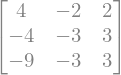

In [23]:
A

In [24]:
sp.det(A)

In [25]:
A.inv()

NonInvertibleMatrixError: Matrix det == 0; not invertible.

<p>Međutim, numpy modul zbog grešaka zaokruživanja daje potpuno drukčije rezultate.</p>

In [26]:
A=np.array([[4,-2,2],[-4,-3,3],[-9,-3,3]])

In [27]:
LA.det(A)

In [28]:
LA.det(A)==0

False

<p>Čak dobivamo i inverznu matricu</p>

In [29]:
LA.inv(A)

array([[-0.00000000e+00, -0.00000000e+00, -1.11111111e-01],
       [ 2.25179981e+15, -4.50359963e+15,  3.00239975e+15],
       [ 2.25179981e+15, -4.50359963e+15,  3.00239975e+15]])

<p style="line-height:25px;">To nije bug u numpy modulu, to je jednostavno posljedica konačne aritmetike. Trebamo li onda izbjegavati korištenje numpy modula? Naravno da ne trebamo, jer bismo onda trebali izbjegavati hardversku aritmetiku računala i raznorazne kalkulatore, excel i slične programe. Ovi jednostavni primjeri samo pokazuju da moramo biti oprezni s rezultatima koje daje računalo, a ne ih uzimati samo zdravo za gotovo. Konkretno na ovom primjeru matrice, vidimo da je sama determinanta reda veličine $10^{-15}$, što je zaista broj jako blizu nule i već iz tog podatka možemo reći da je zadana matrica najvjerojatnije singularna. Čak ako i u stvarnosti nije možda singularna, bolje ju je proglasiti numerički singularnom jer ćemo na taj način napraviti manje štete. Također, brojevi u navodnoj inverznoj matrici su reda veličine $10^{15}$, što su iznimno veliki brojevi s obzirom na jako male brojeve u početnoj matrici pa nam već to mora sugerirati da sumnjamo u točnost rezultata koje je dalo računalo numeričkim putem. Numerički alati poput <i>Octave</i> će tom prilikom obavijestiti korisnika da je početna matrica najvjerojatnije singularna i da dobivenu inverznu matricu treba zanemariti.</p>

<div style="background-color: #fef2ec; color: #000000; border: 2px solid #fcc2a0; padding:10px;">
<h4>Napomena</h4>
<p style="line-height:25px;">Dobar programer može napraviti veliku štetu ukoliko se upusti u implementaciju numeričkih algoritama ako pritom ne poznaje iznimno detaljno područje numeričke matematike. Implementacije numeričkih algoritama treba prepustiti ljudima koji su veliki stručnjaci u području numeričke matematike: dakle, prije svega moraju dobro znati matematiku, a nakon toga još iznimno jako dobro znati numeričku matematiku. Stoga je uvijek najbolje koristiti gotove numeričke biblioteke i alate ukoliko pojedinac nije detaljno upoznat s numeričkom matematikom, nego se upuštati u izradu vlastitih implementacija jer smo vidjeli da i na sasvim banalnom primjeru sve može krenuti u pogrešnom smjeru. Štoviše, ne mora dobiveni rezultat uopće izgledati čudno, a može biti u potpunosti pogrešan. Kako bismo izbjegli takve situacije, najbolje je koristiti gotove numeričke biblioteke i alate. Jedne od takvih numeričkih biblioteka su <i>numpy</i> i <i>scipy</i> za programski jezik python.</p>
</div>

<h2>Zadaci</h2>
<p style="line-height:25px;">Pokazano je na nekoliko zadataka kako ih brzo riješiti pomoću dostupnih naredbi iz <i>numpy</i> i <i>sympy</i> modula. Kao što je bilo rečeno ranije, <i>numpy</i> koristi hardversku aritmetiku računala, a <i>sympy</i> koristi implementirani egzaktni simbolički račun.</p>

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px;">
<h3>1. zadatak</h3>
<p style="line-height:30px;">U $\mathcal{P}_3(t)$ zadani su polinomi $p_1(t)=t^2+t,$ $p_2(t)=t^2-2t+3.$
Prikažite, ako je moguće, polinome $p_3(t)=-t^2+8t-9$ i $p_4(t)=t+2$ kao linearne kombinacije polinoma $p_1$ i $p_2$.</p>
</div>
<h3>Rješenje</h3>

In [30]:
A=sp.Matrix([[1,1,0],[1,-2,3],[-1,8,-9],[0,1,2]])
A=A.T

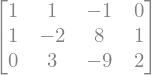

In [31]:
A

<p style="line-height:25px;">Iz reducirane ešalonske forme vidimo da se polinom $p_3$ može prikazati kao linearna kombinacija polinoma $p_1$ i $p_2$, dok se polinom $p_4$ ne može prikazati kao linearna kombinacija polinoma $p_1$ i $p_2$.</p>

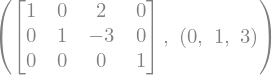

In [32]:
A.rref()

<p>$p_3(t)=2\cdot p_1(t)-3\cdot p_2(t)$</p>

In [33]:
sp.var('x y')
sp.linsolve((A[:,:2],A[:,2]),x,y)

<p>Polinom $p_4$ nije linearna kombinacija polinoma $p_1$ i $p_2$.</p>

In [34]:
sp.linsolve((A[:,:2],A[:,3]),x,y)

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px;">
<h3>2. zadatak</h3>
<p>Neka je $W$ potprostor od $\mathbb{R}^5$ razapet s vektorima</p>
<p style="line-height:35px;">$u_1=(1,2,-1,3,4),\ $ $u_2=(2,4,-2,6,8),\ $ $u_3=(1,3,2,2,6),\ $ $u_4=(1,4,5,1,8),\ $ $u_5=(2,7,3,3,9).$</p>
<p>Odredite jednu bazu i dimenziju vektorskog prostora $W$.</p>
</div>
<h3>Rješenje</h3>

In [35]:
M=sp.Matrix([[1,2,-1,3,4],[2,4,-2,6,8],[1,3,2,2,6],[1,4,5,1,8],[2,7,3,3,9]])
M=M.T

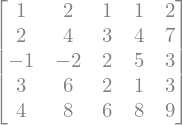

In [36]:
M

<p>Jedna baza za vektorski prostor $W$</p>

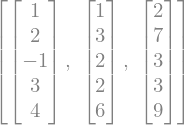

In [37]:
M.columnspace()

<p>$\dim{W}=3$</p>

In [38]:
M.rank()

<p>Možemo sve dobiti i iz reducirane retčane ešalonske forme</p>

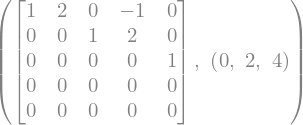

In [39]:
M.rref()

<p style="line-height:25px;">Pomoću numpy modula možemo odrediti dimenziju prostora $W$. Za određivanje neke baze pomoću <i>numpy</i> modula mogli bismo koristiti određene numeričke metode, ali ovdje nećemo dublje ulaziti u numeričku linearnu algebru.</p>

In [40]:
M=np.array([[1,2,-1,3,4],[2,4,-2,6,8],[1,3,2,2,6],[1,4,5,1,8],[2,7,3,3,9]])

In [41]:
M

array([[ 1,  2, -1,  3,  4],
       [ 2,  4, -2,  6,  8],
       [ 1,  3,  2,  2,  6],
       [ 1,  4,  5,  1,  8],
       [ 2,  7,  3,  3,  9]])

In [42]:
LA.matrix_rank(M)

3

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px;">
<h3>3. zadatak</h3>
<p>Odredite dimenziju i jednu bazu vektorskog prostora $R$ svih realnih rješenja homogenog sustava linearnih jednadžbi<p>
<p>\begin{align*}
x+2y+z-3t&=0\\
2x+4y+4z-t&=0\\
3x+6y+7z+t&=0
\end{align*}</p>
<p>i nadopunite dobivenu bazu do baze za $\mathbb{R}^4$.</p>
</div>
<h3>Rješenje</h3>

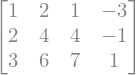

In [43]:
A=sp.Matrix([[1,2,1,-3],[2,4,4,-1],[3,6,7,1]])
A

<p>Jedna baza za $R$</p>

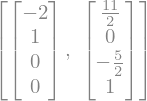

In [44]:
baza=A.nullspace()
baza

<p>$\dim{R}=2$</p>

In [45]:
len(baza)

<p>Jedna nadopuna do baze za $\mathbb{R}^4$: $\big\{(-2,1,0,0),\big(\frac{11}{2},0,-\frac{5}{2},1\big),(1,0,0,0),(0,0,1,0)\big\}$</p>

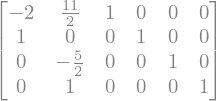

In [46]:
M=sp.Matrix([list(baza[0]),list(baza[1]),[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
M=M.T
M

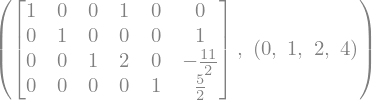

In [47]:
M.rref()

<p style="line-height:25px;">Pomoću numpy modula možemo odrediti $\dim{R}$ jer je ta dimenzija jednaka broju parametara u općem rješenju homogenog sustava.</p>

In [48]:
A=np.array([[1,2,1,-3],[2,4,4,-1],[3,6,7,1]])
A

array([[ 1,  2,  1, -3],
       [ 2,  4,  4, -1],
       [ 3,  6,  7,  1]])

<p>$\text{broj parametara}=\text{broj nepoznanica}-r(A)$</p>

In [49]:
4-LA.matrix_rank(A)

2

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px;">
<h3>4. zadatak</h3>
<p>U $M_2(\mathbb{R})$ zadan je skup $\mathcal{B}=\bigg\{\begin{bmatrix}2&3\\ 0&1\end{bmatrix}, \begin{bmatrix}5&4\\ -1&-1\end{bmatrix}, \begin{bmatrix}2&2\\ 1&1\end{bmatrix}, \begin{bmatrix}8&1\\ -3&4\end{bmatrix}\bigg\}.$</p>
<p>Dokažite da je $\mathcal{B}$ baza za $M_2(\mathbb{R})$ i odredite koordinate matrice $A=\left[\begin{smallmatrix}2&0\\ 0&8\end{smallmatrix}\right]$ u bazi $\mathcal{B}$.</p>
</div>
<h3>Rješenje</h3>

<h4>pomoću sympy modula</h4>

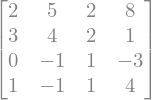

In [50]:
B=sp.Matrix([[2,3,0,1],[5,4,-1,-1],[2,2,1,1],[8,1,-3,4]])
B=B.T
B

<p>$\mathcal{B}$ je baza za $M_2(\mathbb{R})$ jer je matrica $B$ maksimalnog ranga</p>

In [51]:
B.rank()

<p>Ili pomoću determinante, $\mathcal{B}$ je baza za $M_2(\mathbb{R})$ jer je $\det{B}\neq0.$</p>

In [52]:
B.det()

<p>Inverzna matrica matrice $B$</p>

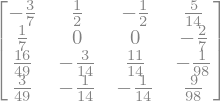

In [53]:
B.inv()

<p>Koordinate matrice $A$ u bazi $\mathcal{B}$</p>

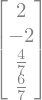

In [54]:
v=B.inv()*sp.Matrix([2,0,0,8])
v

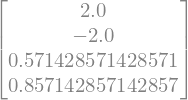

In [55]:
sp.N(v)

<h4>pomoću numpy modula</h4>

In [56]:
B=np.array([[2,3,0,1],[5,4,-1,-1],[2,2,1,1],[8,1,-3,4]])
B

array([[ 2,  3,  0,  1],
       [ 5,  4, -1, -1],
       [ 2,  2,  1,  1],
       [ 8,  1, -3,  4]])

<p>$\mathcal{B}$ je baza za $M_2(\mathbb{R})$ jer je matrica $B$ maksimalnog ranga</p>

In [57]:
LA.matrix_rank(B)

4

<p>Ili pomoću determinante, $\mathcal{B}$ je baza za $M_2(\mathbb{R})$ jer je $\det{B}\neq0.$</p>

In [58]:
LA.det(B)

<p>Inverzna matrica matrice $B$</p>

In [59]:
T=LA.inv(B)
T

array([[-0.42857143,  0.14285714,  0.32653061,  0.06122449],
       [ 0.5       ,  0.        , -0.21428571, -0.07142857],
       [-0.5       ,  0.        ,  0.78571429, -0.07142857],
       [ 0.35714286, -0.28571429, -0.01020408,  0.09183673]])

<p>Koordinate matrice $A$ u bazi $\mathcal{B}$</p>

In [60]:
u=np.array([2,0,0,8])
np.matmul(u,T)

array([ 2.        , -2.        ,  0.57142857,  0.85714286])

<div style="background-color: #fef2ec; color: #000000; border: 2px solid #fcc2a0; padding:10px;">
<h4>Napomena</h4>
<p style="line-height:25px;">Ako transponiramo formulu $Y=BX$, tada dobivamo $Y^T=X^TB^T$. Kako su $X$ i $Y$ jednostupčane matrice, tada su $X^T$ i $Y^T$ jednoredne matrice. Isto tako, stupci matrice $B$ postaju retci matrice $B^T$. Drugim riječima, to znači da kod formiranja matrice prijelaza $T$ možemo koordinate pripadnih vektora umjesto u stupce pisati u retke matrice prijelaza $T$. U tom slučaju formula za računanje koordinata vektora umjesto oblika $Y=TX$ poprima oblik $Y=XT$ pri čemu su $X$ i $Y$ jednoredne matrice. Upravo smo tu činjenicu koristili kod računanja koordinata vektora pomoću numpy modula pa nismo trošili vrijeme na transponiranje matrica.</p>
<ul>
<li style="line-height:25px;">Ako koordinate vektora kod formiranja matrice prijelaza $T$ pišemo u stupce, tada se koordinate vektora računaju po formuli $Y=TX$ pri čemu su $X$ i $Y$ jednostupčane matrice.</li>
<li style="line-height:25px;">Ako koordinate vektora kod formiranja matrice prijelaza $T$ pišemo u retke, tada se koordinate vektora računaju po formuli $Y=XT$ pri čemu su $X$ i $Y$ jednoredne matrice.</li>
</ul>
<p style="line-height:25px;">Koji ćemo pristup odabrati je stvar ukusa, ovisno o tome želimo li radije koordinate vektora pisati u jednostupčane ili jednoredne matrice. Oba pristupa daju na kraju iste koordinate, razlika je samo u zapisu vektora i formi formule.</p>
</div>

<p style="line-height:25px;">Ako nam se više sviđa stupčani zapis vektora, možemo to isto realizirati u numpy modulu. Međutim, s obzirom na unošenje vektora u numpy modulu, jednostavnije nam je preko formule koja koristi retčani zapis vektora.</p>

In [61]:
B

array([[ 2,  3,  0,  1],
       [ 5,  4, -1, -1],
       [ 2,  2,  1,  1],
       [ 8,  1, -3,  4]])

In [62]:
B=B.transpose()
B

array([[ 2,  5,  2,  8],
       [ 3,  4,  2,  1],
       [ 0, -1,  1, -3],
       [ 1, -1,  1,  4]])

In [63]:
T=LA.inv(B)
T

array([[-4.28571429e-01,  5.00000000e-01, -5.00000000e-01,
         3.57142857e-01],
       [ 1.42857143e-01, -5.94762335e-17, -4.75809868e-17,
        -2.85714286e-01],
       [ 3.26530612e-01, -2.14285714e-01,  7.85714286e-01,
        -1.02040816e-02],
       [ 6.12244898e-02, -7.14285714e-02, -7.14285714e-02,
         9.18367347e-02]])

In [64]:
u=np.array([[2],[0],[0],[8]])
np.matmul(T,u)

array([[ 2.        ],
       [-2.        ],
       [ 0.57142857],
       [ 0.85714286]])

<p style="line-height:25px;">Kod množenja matrica, jednodimenzionalnu listu numpy zapravo prilagođava kao retčanu ili stupčanu matricu, ovisno o tome nalazi li se ta lista lijevo ili desno od matrice s kojom se množi. Stoga možemo vektor pisati kao jednodimenzionalnu listu i koristiti stupčani zapis linearnog operatora. Na izlazu se opet vraća jednodimenzionalna lista.</p>

In [65]:
u1=np.array([2,0,0,8])
np.matmul(T,u1)

array([ 2.        , -2.        ,  0.57142857,  0.85714286])

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px;">
<h3>5. zadatak</h3>
<p>U $\mathcal{P}_4(t)$ zadani su polinomi</p>
<p>$$\begin{aligned}p_1(t)&=9t^3-13t^2-t+3\\ p_2(t)&=17t^2-6\\ p_3(t)&=6t^3+12t^2+26t+17\\ p_4(t)&=7t^3-4t^2-21t-6\\ 
 q_1(t)&=14t^3+5t^2+6t-1\\ q_2(t)&=9t^3-16t^2-5t+17\\ q_3(t)&=-21t^3+6t^2+2t-10\\ q_4(t)&=-23t^3+15t^2+15t-22\end{aligned}$$</p>
<p>Odredite matricu prijelaza iz baze $\mathcal{B}_2=\big\{q_1,q_2,q_3,q_4\big\}$ u bazu $\mathcal{B}_1=\big\{p_1,p_2,p_3,p_4\big\}.$</p>
</div>
<h3>Rješenje</h3>

<p>$\mathcal{B}_{\tiny\text{kan}}\stackrel{\ T_1\ }{\longrightarrow}\mathcal{B}_1,\quad \mathcal{B}_{\tiny\text{kan}}\stackrel{\ T_2\ }{\longrightarrow}\mathcal{B}_2,\quad\mathcal{B}_2\xrightarrow{\ T_2^{-1}T_1\ }\mathcal{B}_1$</p>
<h4>pomoću sympy modula</h4>

In [66]:
T1=sp.Matrix([[9,-13,-1,3],[0,17,0,-6],[6,12,26,17],[7,-4,-21,-6]])
T1=T1.T

In [67]:
T2=sp.Matrix([[14,5,6,-1],[9,-16,-5,17],[-21,6,2,-10],[-23,15,15,-22]])
T2=T2.T

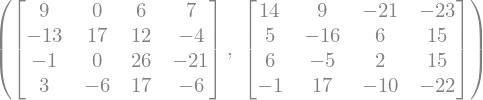

In [68]:
T1,T2

<p>Matrica prijelaza iz baze $\mathcal{B}_2$ u bazu $\mathcal{B}_1$</p>

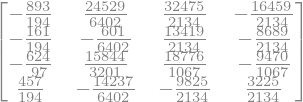

In [69]:
T=T2.inv()*T1
T

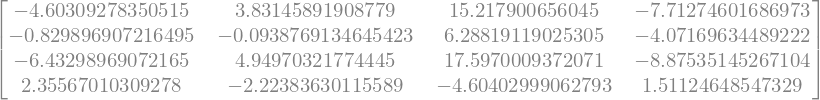

In [70]:
sp.N(T)

<h4>pomoću numpy modula</h4>

In [71]:
T1=np.array([[9,-13,-1,3],[0,17,0,-6],[6,12,26,17],[7,-4,-21,-6]])
T1=T1.transpose()

In [72]:
T2=np.array([[14,5,6,-1],[9,-16,-5,17],[-21,6,2,-10],[-23,15,15,-22]])
T2=T2.transpose()

In [73]:
T1

array([[  9,   0,   6,   7],
       [-13,  17,  12,  -4],
       [ -1,   0,  26, -21],
       [  3,  -6,  17,  -6]])

In [74]:
T2

array([[ 14,   9, -21, -23],
       [  5, -16,   6,  15],
       [  6,  -5,   2,  15],
       [ -1,  17, -10, -22]])

<p>Matrica prijelaza iz baze $\mathcal{B}_2$ u bazu $\mathcal{B}_1$</p>

In [75]:
np.matmul(LA.inv(T2),T1)

array([[-4.60309278,  3.83145892, 15.21790066, -7.71274602],
       [-0.82989691, -0.09387691,  6.28819119, -4.07169634],
       [-6.43298969,  4.94970322, 17.59700094, -8.87535145],
       [ 2.3556701 , -2.2238363 , -4.60402999,  1.51124649]])